<a href="https://colab.research.google.com/github/PranayPrasanth/100DaysOfCode-DataScience-Projects/blob/master/Lego_Analysis_for_Course_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

<img src="https://i.imgur.com/49FNOHj.jpg">

### Understanding LEGO Themes vs LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their includes Star Wars, Batman, Harry Potter and many more


# Import Statements

In [ ]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

In [ ]:
# Load the colors dataset and display the first few rows
colors_df = pd.read_csv('./data/colors.csv')
colors_df.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [ ]:
# Get the number of unique color names in the dataset
colors_df['name'].nunique()

135

In [ ]:
# Check the data types of the columns in the colors dataset
colors_df.dtypes

,0
id,int64
name,object
rgb,object
is_trans,object


In [ ]:
# Get the count of each value in the 'is_trans' column
colors_df['is_trans'].value_counts()

,count
is_trans,
f,107
t,28


In [ ]:
# Filter for transparent colors and count the number of rows
colors_df[colors_df['is_trans'] == 't'].shape[0]

28

In [ ]:
# Filter for non-transparent colors and count the number of rows
colors_df[colors_df['is_trans'] == 'f'].shape[0]

107

 ### Understanding LEGO Themes vs. LEGO Sets

In [ ]:
# Load the sets dataset and display the first two rows
sets_df = pd.read_csv('./data/sets.csv')
sets_df.head(2)

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12


In [ ]:
# Display the last two rows of the sets dataset
sets_df.tail(2)

,set_num,name,year,theme_id,num_parts
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


In [ ]:
# Check the data types of the columns in the sets dataset
sets_df.dtypes

,0
set_num,object
name,object
year,int64
theme_id,int64
num_parts,int64


In [ ]:
# Sort the sets dataset by year in ascending order and display the first few rows
sets_df.sort_values(by='year', ascending=True).head()

,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178


In [ ]:
# Filter for sets released in 1949 and count the number of sets
sets_df[sets_df['year'] == 1949]['set_num'].size

5

In [ ]:
# Sort the sets dataset by the number of parts in descending order and display the top 5
sets_df.sort_values(by='num_parts', ascending=False).head(5)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


In [ ]:
# Group sets by year and count the number of sets, then rename the column
sets_by_year = sets_df.groupby('year')['set_num'].count().reset_index().rename(columns={'set_num':'Number of Sets'})
sets_by_year

,year,Number of Sets
0,1949,5
1,1950,6
2,1953,4
3,1954,14
4,1955,28
...,...,...
66,2017,786
67,2018,816
68,2019,840
69,2020,674


# Visualisations

Text(0, 0.5, 'Number of sets')

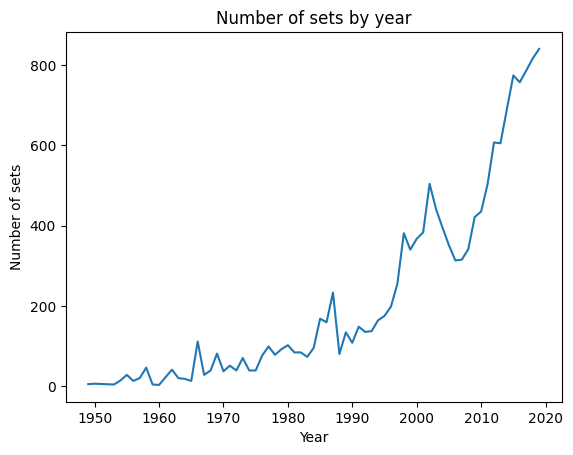

In [ ]:
# Plot the number of sets released per year (excluding the last two years)
plt.plot(sets_by_year.year[:-2], sets_by_year['Number of Sets'][:-2])
plt.title('Number of sets by year')
plt.xlabel('Year')
plt.ylabel('Number of sets')

In [ ]:
# Group sets by year and count the number of unique themes, then rename the column
set_themes_by_year = sets_df.groupby(by='year')['theme_id'].nunique().reset_index().rename(columns={'theme_id': 'Number of Themes Released'})
set_themes_by_year.head()

,year,Number of Themes Released
0,1949,2
1,1950,1
2,1953,2
3,1954,2
4,1955,4


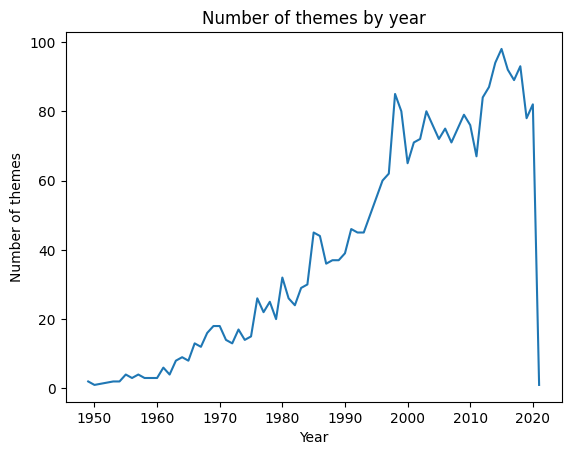

In [ ]:
# Plot the number of themes released per year
plt.plot(set_themes_by_year['year'], set_themes_by_year['Number of Themes Released'])
plt.title('Number of themes by year')
plt.xlabel('Year')
plt.ylabel('Number of themes')
plt.show()

### Line Charts with Two Seperate Axes

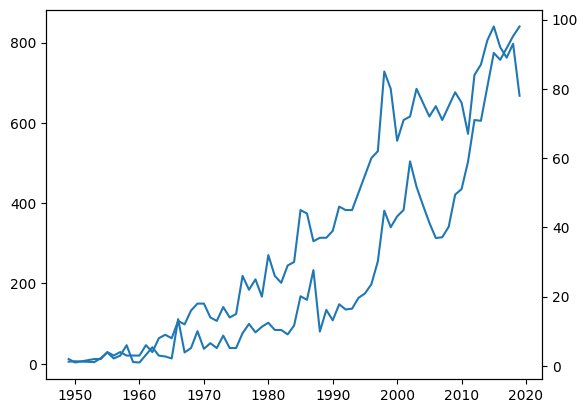

In [ ]:
# Create a dual-axis plot showing the number of sets and themes released per year
ax1 = plt.gca() # get the current axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.plot(sets_by_year['year'][:-2], sets_by_year['Number of Sets'][:-2])
ax2.plot(set_themes_by_year['year'][:-2], set_themes_by_year['Number of Themes Released'][:-2])

In [ ]:
# Group sets by year and calculate the average number of parts, then rename the column
avg_parts_by_year = sets_df.groupby(by='year').agg({'num_parts': 'mean'}).reset_index().rename(columns={'num_parts': 'Average number of parts'})
avg_parts_by_year.head()

,year,Average number of parts
0,1949,99.600000
1,1950,1.000000
2,1953,13.500000
3,1954,12.357143
4,1955,36.607143


In [ ]:
# Filter the average parts by year for specific years and display the results
avg_parts_by_year[avg_parts_by_year['year'].isin([1954, 2017])].head()

,year,Average number of parts
3,1954,12.357143
66,2017,221.840967


### Scatter Plots in Matplotlib

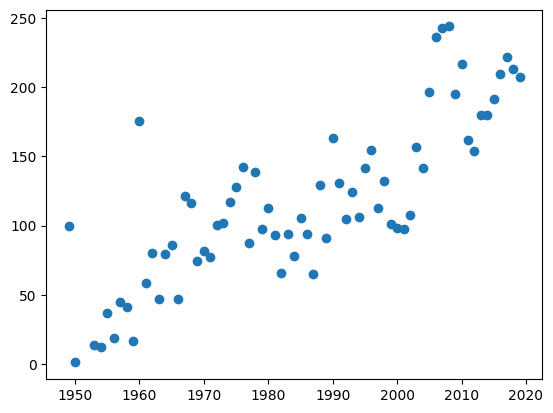

In [ ]:
# Create a scatter plot of the average number of parts per year
plt.scatter(avg_parts_by_year['year'][:-2], avg_parts_by_year['Average number of parts'][:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

In [ ]:
# Get the count of each theme ID in the sets dataset
sets['theme_id'].value_counts()

,count
theme_id,
158,753
501,656
494,398
435,356
503,329
...,...
512,1
370,1
34,1


<img src= https://i.imgur.com/Sg4lcjx.png>

## Merging Datasets

In [ ]:
# Load the themes dataset and display the first few rows
themes_df = pd.read_csv('./data/themes.csv')
themes_df.head()


,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [ ]:
# Filter the themes dataset for rows where the name is 'Star Wars'
themes_df[themes_df['name'] == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


In [ ]:
# Filter the sets dataset for rows where the theme_id is 18
sets[sets['theme_id'] == 18]

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


In [ ]:
# Filter the sets dataset for rows where the theme_id is 209
sets[sets['theme_id'] == 209]

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


### Merging (i.e., Combining) DataFrames based on a Key


In [ ]:
# Get the count of each theme ID in the sets dataset and rename the columns
set_themes_count = sets['theme_id'].value_counts().reset_index()
set_themes_count.columns = ['id', 'Count']

In [ ]:
# Merge the themes and set themes count dataframes on the 'id' column, drop the 'parent_id' column, and display the first few rows
merged_df = pd.merge(themes_df, set_themes_count, on='id')
merged_df.drop('parent_id', axis=1, inplace=True)
merged_df.head()

,id,name,Count
0,1,Technic,167
1,2,Arctic Technic,4
2,3,Competition,18
3,4,Expert Builder,39
4,5,Model,12


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Technic'),
  Text(1, 0, 'Arctic Technic'),
  Text(2, 0, 'Competition'),
  Text(3, 0, 'Expert Builder'),
  Text(4, 0, 'Model'),
  Text(5, 0, 'Airport'),
  Text(6, 0, 'Construction'),
  Text(7, 0, 'Farm'),
  Text(8, 0, 'Fire'),
  Text(9, 0, 'Harbor')])

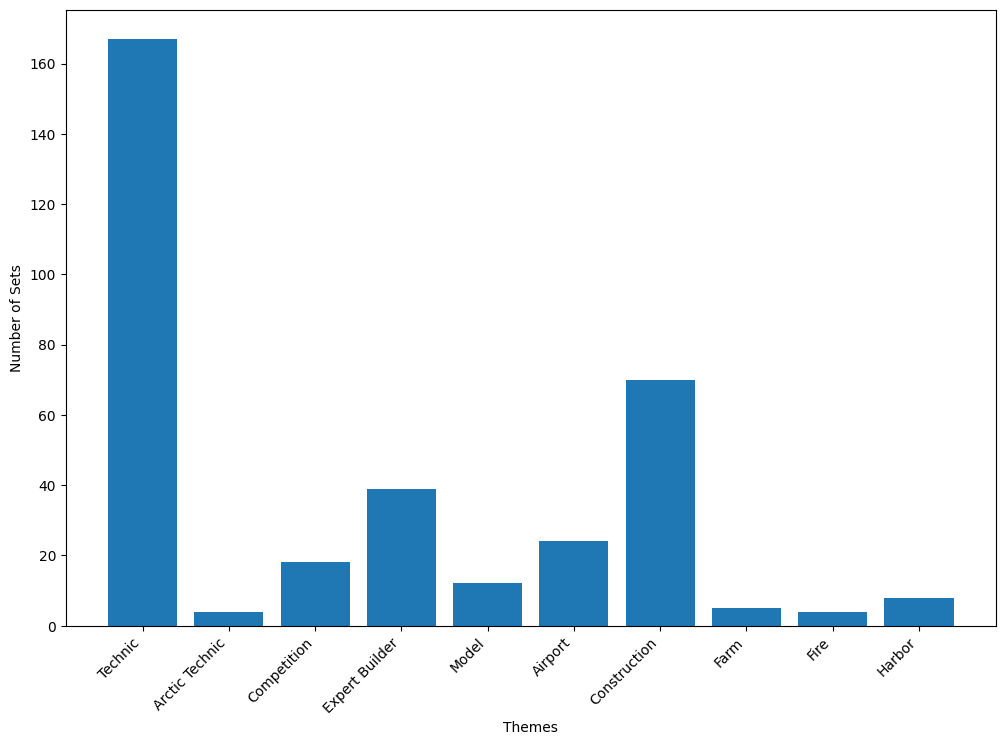

In [ ]:
# Create a bar chart showing the number of sets for the top 10 themes
plt.figure(figsize=(12,8))
plt.bar(merged_df.name[:10], merged_df.Count[:10])
plt.xlabel('Themes')
plt.ylabel('Number of Sets')
plt.xticks(rotation=45, horizontalalignment='right')

# Conclusion

From the analysis of the LEGO dataset, we were able to uncover some interesting insights about the history and evolution of LEGO sets:

*   LEGO started in 1949 with a modest offering of 5 different sets.
*   The sets with the most parts are "The Ultimate Battle for Chima" (9987 parts) and "UCS Millennium Falcon" (7541 parts).
*   The number of sets and themes released by LEGO has generally increased over the years, with significant growth observed from the late 1990s onwards, indicating a period of expansion in their product offering.
*   The average number of parts per set has also shown an upward trend over time, suggesting that LEGO sets have become more complex.
*   Based on the number of sets, the "Technic" theme appears to be the most popular or prolific LEGO theme.

These findings provide a glimpse into LEGO's journey, from its humble beginnings to becoming a global brand with a diverse range of complex sets and popular themes.